In [32]:
import pandas
import matplotlib.pyplot as plt
import seaborn

In [33]:
import scipy.stats as stats

In [40]:
data = pandas.read_csv("A:/Programming/Python/NLP/Data files/Data cleaning outliers/deputies_dataset/deputies_dataset.csv")

In [35]:
data.head(10)

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value
0,0,2013-03-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,3.530749e+12,Fuels and lubricants.,AUTO POSTO 314 NORTE LTDA,70
1,0,2013-07-24 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,104
2,0,2013-02-17 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100
3,0,2013-03-15 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100
4,0,2013-01-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,77
5,0,2013-02-06 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,131
6,0,2013-04-18 00:00:00,1772,PSB,SP,Abelardo Camarinha,6.143204e+12,Fuels and lubricants.,AUTO POSTO AV ESMERALDA LTDA,2840
7,0,2013-05-14 00:00:00,1772,PSB,SP,Abelardo Camarinha,6.143204e+12,Fuels and lubricants.,AUTO POSTO AV ESMERALDA LTDA,2517
8,0,2013-06-21 00:00:00,1772,PSB,SP,Abelardo Camarinha,6.143204e+12,Fuels and lubricants.,AUTO POSTO AV ESMERALDA LTDA,2509
9,0,2013-07-20 00:00:00,1772,PSB,SP,Abelardo Camarinha,6.143204e+12,Fuels and lubricants.,AUTO POSTO AV ESMERALDA LTDA,2720


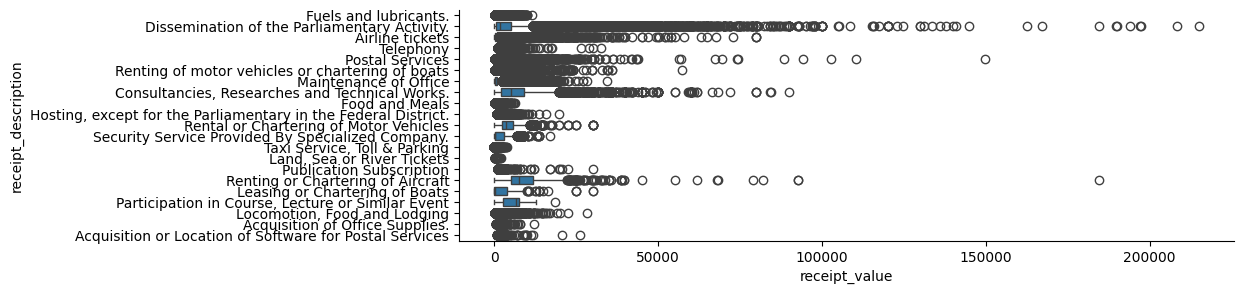

In [36]:
figure = plt.figure(figsize=(10, 3))
ax = seaborn.boxplot(data=data, x="receipt_value", y="receipt_description", orient='h')
seaborn.utils.despine(figure)

In [4]:
# v = [1, 3, 2, 4, 5, 5, 3, 5, 3, 4, 6, 15]
# z_score_v = stats.zscore(v)
# print(z_score_v)

In [41]:
# data_receipt_value_column
# data_receipt_description_values

data_receipt_value_column = data['receipt_value']
data_receipt_description_column = data['receipt_description']

data_receipt_description_values = list(data_receipt_description_column.unique())

z_score_receipt_value = stats.zscore(data_receipt_value_column)


distinct_rcpt_desc = len(data_receipt_description_values)
outliers_4_each_rcpt_desc = [[] for x in range(distinct_rcpt_desc)]
outliers_4_each_rcpt_desc_index = [[] for x in range(distinct_rcpt_desc)]

cnt = 0
for i in range(len(data_receipt_value_column)):
    rcpt_desc = data_receipt_description_column[i]
    rcpt_value = data_receipt_value_column[i]
#     print("rcpt value: ", rcpt_value)
#     print("rcpt des: ", rcpt_desc)
    ind = 0
    for j in data_receipt_description_values:
        if j==rcpt_desc:
            ind = data_receipt_description_values.index(j)
    outliers_4_each_rcpt_desc[ind].append(rcpt_value)
    outliers_4_each_rcpt_desc_index[ind].append(i)
    cnt += 1


# for i in range(len(outliers_4_each_rcpt_desc)):
#     print("Rcpt desc: ", data_receipt_description_values[i])
#     for j in outliers_4_each_rcpt_desc[i]:
#         print(j, end=" ")
#     print("\n")


In [73]:
print("Number of rows in data: ", cnt)
print("\n")

#outliers_4_each_rcpt_desc

outliers_zscore_4_each_desc = [None] * len(outliers_4_each_rcpt_desc)
ind_outliers_rows = []

for i in range(len(outliers_4_each_rcpt_desc)):#take each desc rcpt_values
    z_score_i = stats.zscore(outliers_4_each_rcpt_desc[i])
    outliers_zscore_4_each_desc[i] = list(z_score_i)
    print("Rcpt_Desc: ", data_receipt_description_values[i])
    print(list(z_score_i))
    for j in outliers_zscore_4_each_desc[i]:
        if j<-3 or j>3:
#             print("z score value: ", j)
            ind_outliers_rows.append(
                outliers_4_each_rcpt_desc_index[i][outliers_zscore_4_each_desc[i].index(j)])
#             print("appended value: ", ind_outliers_rows[-1])
ind_outliers_rows = list(set(ind_outliers_rows))
print("Index to be deleted: ", ind_outliers_rows)

 
len(data)
    

Number of rows in data:  32


Rcpt_Desc:  Fuels and lubricants.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Rcpt_Desc:  Dissemination of the Parliamentary Activity.
[1.837095631848545, 2.0769663638342317, 2.0769663638342317, 1.2374188018843277, 2.0769663638342317, 2.0769663638342317, 2.0769663638342317, 2.0769663638342317, 1.597224899862858, 0.3379035569380018, 1.837095631848545, 0.7576773379129539, 0.7576773379129539, 1.2014381920864747, 1.2748386360740949, 0.9075965454040081, 1.5686802827565614, 2.4367724618127617, 1.597224899862858, 1.597224899862858, 1.597224899862858, 1.597224899862858, 1.597224899862858, 1.597224899862858, 1.597224899862858, 1.597224899862858, 1.597224899862858, 1.597224899862858, 1.597224899862858, -0.20180559002979376, 0.09803282495231488, -0.20180559002979376, 1.2973864848807495, 0.12022086766099092, 0.8026531001602701, 0.8026531001602701, 0.8026531001602701, 0.8020534233303059, 0.2563475080628682, 0.2563475080628682, 0.8020534233303059, 1.552848814445506, 0.37388416673585484, 0.8026531001602701, -0.3217409560226372, -0.4416763220154806, -0.3217409560226372, -0.3217

Rcpt_Desc:  Airline tickets


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Rcpt_Desc:  Telephony


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Rcpt_Desc:  Postal Services


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Rcpt_Desc:  Renting of motor vehicles or chartering of boats


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Rcpt_Desc:  Maintenance of Office


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Rcpt_Desc:  Consultancies, Researches and Technical Works.
[0.7366795201850063, 0.5755783009813839, 0.5755783009813839, 3.7976026850538327, 3.7976026850538327, -0.6326808430457844, 1.703286835406741, -0.9262072644347845, -0.9262072644347845, -0.9262072644347845, -0.9262072644347845, 1.381084396999496, 0.12449488721124102, 1.058881958592251, -0.9262072644347845, -0.7293415745679579, -0.8169806378147285, -0.7293415745679579, -0.7293415745679579, -0.7293415745679579, -1.0156184410927949, -0.9640660509476358, -0.7132314526475957, -0.7132314526475957, -0.7132314526475957, -0.7132314526475957, -0.7132314526475957, -0.7132314526475957, -0.7132314526475957, -0.7132314526475957, -0.9883923350473828, -0.9856536143209211, -0.9856536143209211, -0.9856536143209211, -0.9819482862792379, -0.9819482862792379, -0.9819482862792379, -0.9819482862792379, -0.6028771174931142, -0.31192831561137213, 0.3339264721759502, 0.3339264721759502, 0.3339264721759502, 0.31330551611788654, -0.22992779503672833, -0.2299

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Rcpt_Desc:  Hosting, except for the Parliamentary in the Federal District.
[0.0880038551450629, -0.36854425635486193, -0.1310573463369638, 1.5641078389632053, 1.506783412407161, -0.21909128711946052, 0.4094301040485974, -0.2211385880678907, 0.6325859074274844, 1.6869458958690147, 1.1587422511740344, -0.004124687534294132, 0.2190311158445929, 4.37095743926095, 1.6603309835394227, -0.08806402641993054, 0.8147956918377683, 0.167848592133839, 1.0686610094431075, 0.5588830732839988, 0.7574712652817239, -0.3235036354893985, -0.3787807610970127, -0.3726388582517222, -0.3726388582517222, 0.02658482669215821, -0.04711800745132741, -0.1638141615118463, -0.47090930377636975, -0.47090930377636975, -0.4545308961889285, -0.290746820314516, -0.2866522184176557, -0.3521658487674207, -0.045070706502897254, -0.5466594388682855, -0.3521658487674207, -0.27027381083021446, -0.20476018048044944, -0.2293277918616113, 1.0481879999588062, -0.5568959436104363, -0.5568959436104363, 0.002017215310996337, 0.010206

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Rcpt_Desc:  Land, Sea or River Tickets
[0.34477817642694625, 0.5422455739863854, 1.124774396786731, 0.1769308885014229, 0.2657912174031706, -0.12914357771570784, -0.060029988569904116, -0.01066313918004432, -0.03040987893598824, 0.07819718972170332, -0.1587636873496237, -0.42534467405486664, -0.6030653318583619, -0.7314191402719974, -0.7709126197838853, -0.7709126197838853, -0.19825716686151154, -0.10939683795976392, 6.377407171867813, -0.6623055511261936, 0.7890798209356844, 0.7890798209356844, 0.7890798209356844, -0.6623055511261936, 0.8088265606916283, 1.5690760412954694, 2.062744535194067, 3.099448372381123, -0.5043316330786423, -0.4944582632006703, -0.4055979342989227, -0.42534467405486664, -0.583318592102418, -0.7412925101499693, -0.4055979342989227, -0.41547130417689465, -0.42534467405486664, -0.07977672832584803, -0.4549647836887825, 0.5126254643524696, -0.7017990306380815, 1.154394506420647, 0.9174336293493199, 0.9174336293493199, 0.9174336293493199, 0.8384466703255442, -0.632

3014848

In [74]:
len(ind_outliers_rows)


12501

In [75]:
len(data)

3014848

In [ ]:
cnt = 0
for i in ind_outliers_rows:
    if cnt%10 == 0:
        print("cnt %d Index to be deleted: %d"%(cnt, i))
    data.drop(index=i, inplace=True)
    cnt += 1

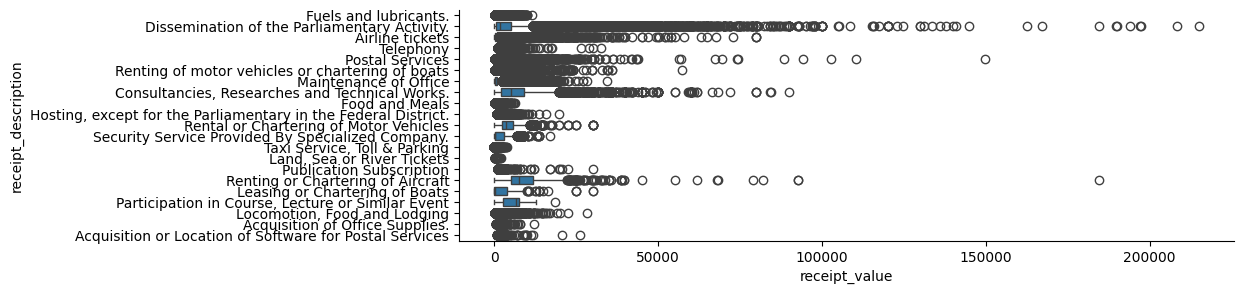

In [72]:
figure = plt.figure(figsize=(10, 3))
ax = seaborn.boxplot(data=data, x="receipt_value", y="receipt_description", orient='h')
seaborn.utils.despine(figure)

In [60]:
print("initial number: ", len(ind_outliers_rows))
inde = 0
for i in ind_outliers_rows:
    if i == 181872:
        inde = ind_outliers_rows.index(i)
ind_outliers_rows = ind_outliers_rows[inde+1:]
print("final number: ", len(ind_outliers_rows))

initial number:  7655
final number:  5654


In [53]:
ia = 0
a = [23, 12, 2, 13, 5, 6, 34]
for i in a:
    print(i)
    if i==2:
        print("entered")
        ia = a.index(i)
print(ia)
na = a[ia+1:]

23
12
2
entered
13
5
6
34
2


In [54]:
na

[13, 5, 6, 34]